<a href="https://colab.research.google.com/github/Naitik582/Wine_Quality_Prediction/blob/main/wineqt_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload ()

Saving WineQT.csv to WineQT.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
print ("\033[1mDataset\033[0m")
df = pd.read_csv("WineQT.csv")

print(df.head())

print(df.info())

print(df.isnull().sum())

Dataset
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  


Exploratory Data Analysis
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000    

<ipython-input-31-4fd10ae9cfbf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['quality'], palette="Set2")


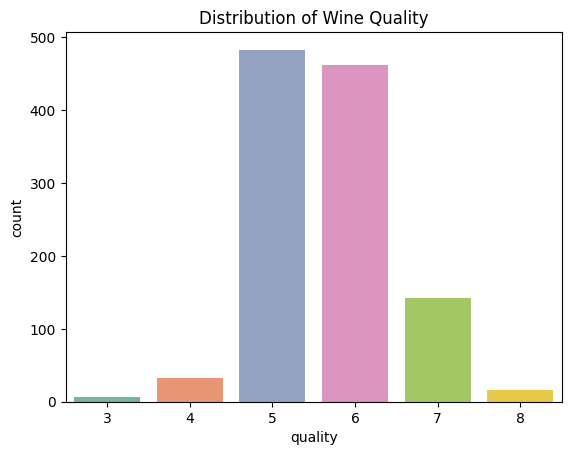

In [ ]:
print ("\033[1mExploratory Data Analysis\033[0m")
print(df.describe())

sns.countplot(x=df['quality'], palette="Set2")
plt.title("Distribution of Wine Quality")
plt.show()

EDA


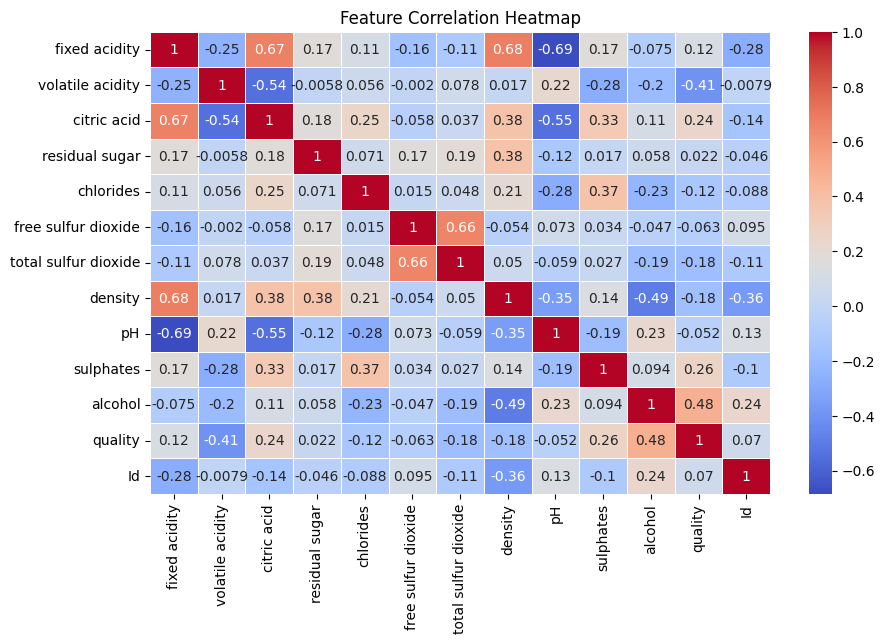

In [ ]:
print ("\033[1mEDA\033[0m")
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
print ("\033[1mData Processing\033[0m")
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

X = df.drop(columns=['quality'])
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Train Data Shape:", X_train_scaled.shape, y_train.shape)
print("Test Data Shape:", X_test_scaled.shape, y_test.shape)

Data Processing
Train Data Shape: (914, 11) (914,)
Test Data Shape: (229, 11) (229,)


In [ ]:
print("\033[1mData Modeling\033[0m")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
sgd = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
svc = SVC(kernel='rbf', random_state=42)

rf.fit(X_train_scaled, y_train)
sgd.fit(X_train_scaled, y_train)
svc.fit(X_train_scaled, y_train)

Data Modeling


SVC(random_state=42)

In [ ]:
print ("\033[1mModel Evaluation\033[0m")
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_model(y_test, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)

evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_sgd, "SGD Classifier")
evaluate_model(y_test, y_pred_svc, "SVC")

Model Evaluation

Model: Random Forest
Accuracy: 0.7117903930131004
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.73      0.86      0.79        97
           6       0.69      0.72      0.70        92
           7       0.70      0.48      0.57        29
           8       0.00      0.00      0.00         3

    accuracy                           0.71       229
   macro avg       0.35      0.34      0.34       229
weighted avg       0.68      0.71      0.69       229

Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  4  3  0  0]
 [ 0  0 83 13  1  0]
 [ 0  0 22 66  4  0]
 [ 0  0  3 12 14  0]
 [ 0  0  0  2  1  0]]
--------------------------------------------------

Model: SGD Classifier
Accuracy: 0.5764192139737991
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Visualizing Model Performance


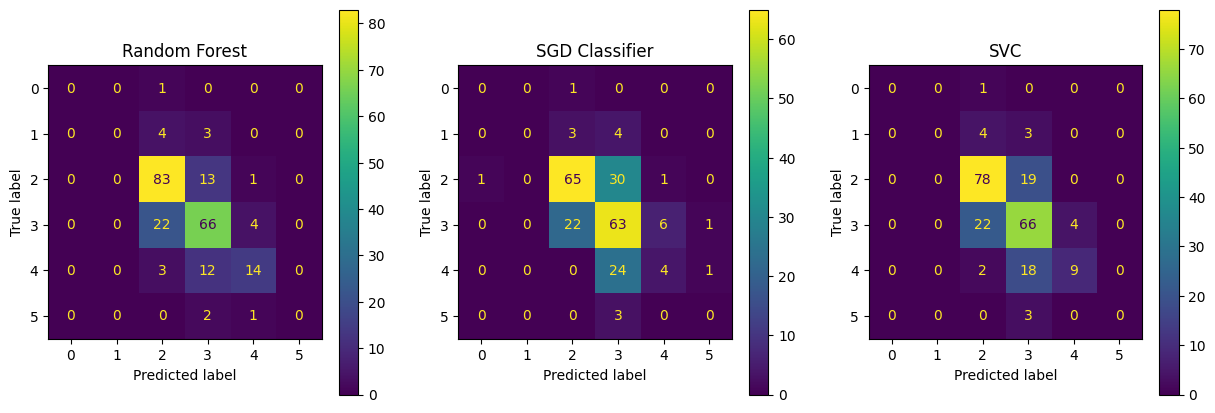

In [ ]:
print ("\033[1mVisualizing Model Performance\033[0m")
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, (model, y_pred, title) in enumerate([
    (rf, y_pred_rf, "Random Forest"),
    (sgd, y_pred_sgd, "SGD Classifier"),
    (svc, y_pred_svc, "SVC")
]):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax[i])
    ax[i].set_title(title)

plt.show()

Choosing The Best Model


<ipython-input-40-07be534de33a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=features, palette="viridis")


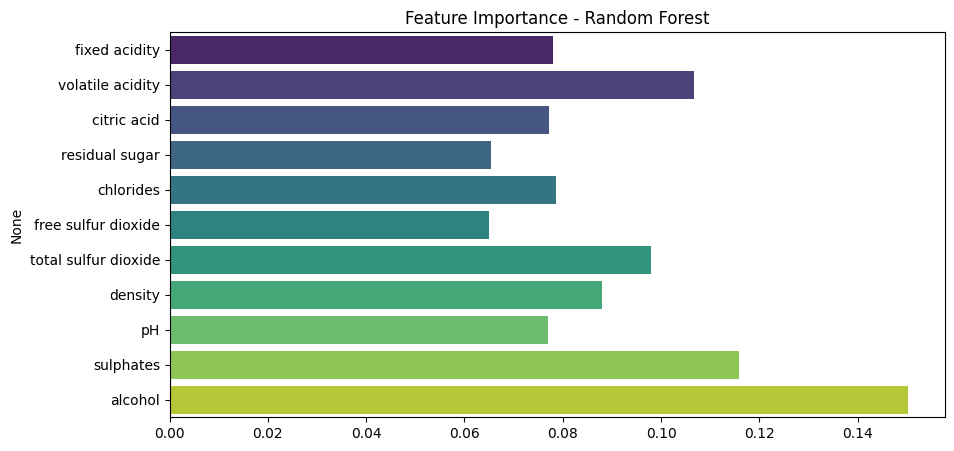

In [ ]:
print ("\033[1mChoosing The Best Model\033[0m")
feature_importance = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=features, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.show()